In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [18]:
df=pd.read_csv('C:/Users/Pranav/Downloads/archive/Titanic-Dataset.csv')

In [19]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [28]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [29]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C


In [30]:
df['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [31]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [32]:
df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True


In [33]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [34]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

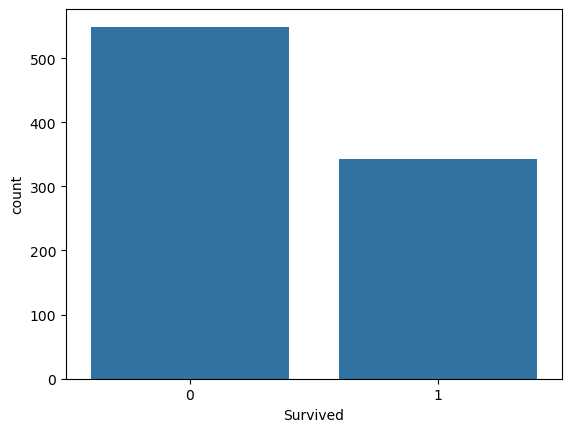

In [36]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

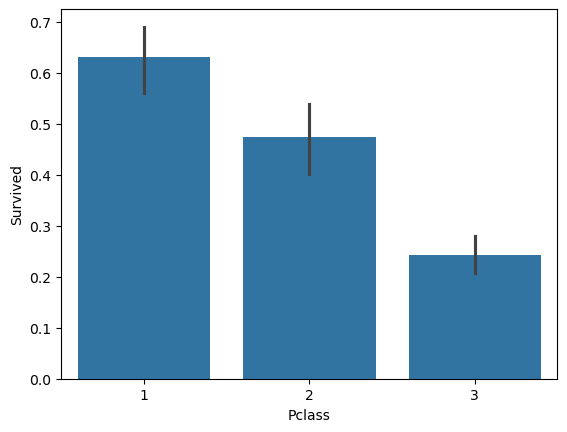

In [37]:
sns.barplot(x='Pclass', y='Survived', data=df)

<Axes: xlabel='Survived', ylabel='Age'>

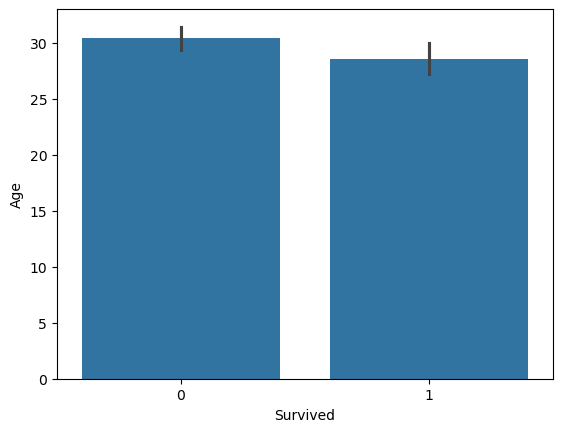

In [39]:
sns.barplot(x='Survived', y='Age', data=df)

In [40]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.221009,0.074053
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.074115,-0.119224
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.013855,-0.019336
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.026354,0.068734
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.081228,0.060814
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,-0.117216,-0.162184
Embarked_Q,0.003650,0.221009,0.074115,-0.013855,-0.026354,-0.081228,-0.117216,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,-0.119224,-0.019336,0.068734,0.060814,-0.162184,-0.499421,1.000000


<Axes: xlabel='Age', ylabel='Survived'>

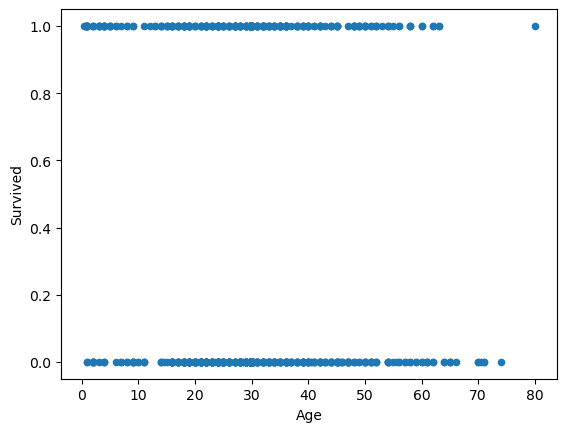

In [43]:
df.plot.scatter(x='Age',y='Survived')

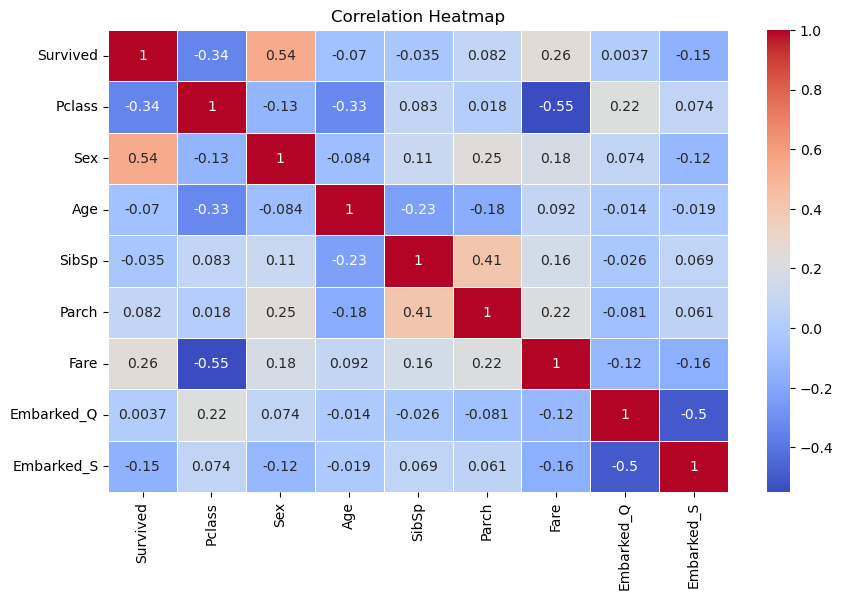

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

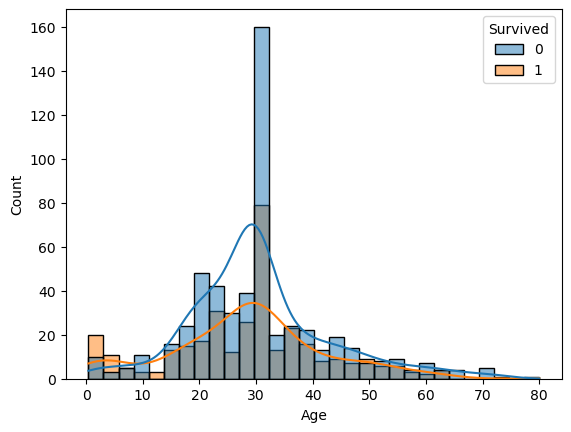

In [45]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)

In [47]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,False,True
1,1,1,1,38.000000,1,0,71.2833,False,False
2,1,3,1,26.000000,0,0,7.9250,False,True
3,1,1,1,35.000000,1,0,53.1000,False,True
4,0,3,0,35.000000,0,0,8.0500,False,True
5,0,3,0,29.699118,0,0,8.4583,True,False
6,0,1,0,54.000000,0,0,51.8625,False,True
7,0,3,0,2.000000,3,1,21.0750,False,True
8,1,3,1,27.000000,0,2,11.1333,False,True
9,1,2,1,14.000000,1,0,30.0708,False,False


In [48]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
X_train_scaled

array([[-1.61413602, -0.7243102 ,  1.22920747, ..., -0.07868358,
        -0.30335547,  0.59248936],
       [-0.40055118, -0.7243102 , -0.50350514, ..., -0.37714494,
        -0.30335547,  0.59248936],
       [ 0.81303367, -0.7243102 ,  0.18957991, ..., -0.47486697,
        -0.30335547,  0.59248936],
       ...,
       [ 0.81303367, -0.7243102 ,  0.88266495, ..., -0.35580399,
        -0.30335547,  0.59248936],
       [-1.61413602,  1.38062393, -1.19659018, ...,  1.68320121,
        -0.30335547,  0.59248936],
       [-1.61413602, -0.7243102 , -0.65752403, ...,  0.86074761,
        -0.30335547,  0.59248936]])

In [51]:
X_test_scaled

array([[ 0.81303367, -0.7243102 ,  0.01239022, ..., -0.33390078,
        -0.30335547, -1.68779402],
       [-0.40055118, -0.7243102 ,  0.11257046, ..., -0.42528387,
        -0.30335547,  0.59248936],
       [ 0.81303367, -0.7243102 , -0.73453348, ..., -0.47486697,
        -0.30335547,  0.59248936],
       ...,
       [ 0.81303367,  1.38062393,  0.6516366 , ..., -0.02308312,
        -0.30335547,  0.59248936],
       [-0.40055118,  1.38062393, -0.96556183, ..., -0.42528387,
        -0.30335547,  0.59248936],
       [ 0.81303367,  1.38062393, -1.96668467, ..., -0.30589933,
        -0.30335547,  0.59248936]])

In [53]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 81.00558659217877
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [60]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


lr = RandomForestClassifier()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 82.12290502793296
[[91 14]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



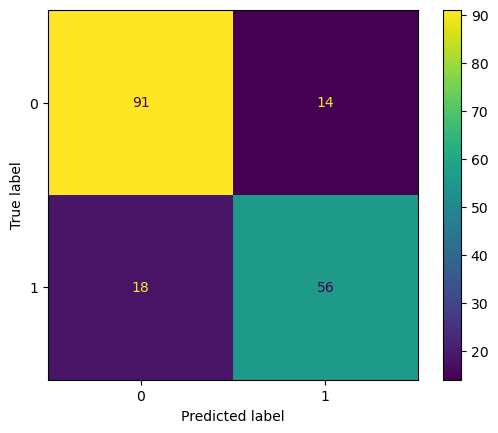

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

y_pred = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


lr = GradientBoostingClassifier()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 81.56424581005587
[[94 11]
 [22 52]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [64]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


lr = SVC()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 82.12290502793296
[[95 10]
 [22 52]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [65]:
!pip install catboost


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
    --------------------------------------- 2.4/102.4 MB 12.2 MB/s eta 0:00:09
   -- ------------------------------------- 5.8/102.4 MB 14.7 MB/s eta 0:00:07
   --- ------------------------------------ 8.7/102.4 MB 14.1 MB/s eta 0:00:07
   ---- ----------------------------------- 10.7/102.4 MB 12.9 MB/s eta 0:00:08
   ----- ---------------------------------- 13.1/102.4 MB 12.5 MB/s eta 0:00:08
   ----- ---------------------------------- 15.2/102.4 MB 12.0 MB/s eta 0:00:08
   ------ --------------------------------- 17.6/102.4 MB 11.9 MB/s eta 0:00:08
   ------ --------------------------------- 17.8/102.4 MB 11.8 MB/s eta 0:00:08
   ------- -------------------------------- 18.4/102.4 MB 10.0 MB/s eta 0:00:09
   ------- -------------------------------- 18.4/102.4 MB 10.0 MB/s eta 0:00:09
   ------- -------------------------------- 18.6/102.4 MB 7.9 MB/s eta 0:00:11
   ------- -------------------------------- 19.4/102.

In [73]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr = CatBoostClassifier(verbose=0)  
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 82.68156424581005
[[96  9]
 [22 52]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



In [68]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.1/150.0 MB 16.8 MB/s eta 0:00:09
   - -------------------------------------- 5.8/150.0 MB 14.7 MB/s eta 0:00:10
   -- ------------------------------------- 8.9/150.0 MB 14.2 MB/s eta 0:00:10
   --- ------------------------------------ 11.5/150.0 MB 13.9 MB/s eta 0:00:10
   --- ------------------------------------ 14.4/150.0 MB 13.5 MB/s eta 0:00:11
   ---- ----------------------------------- 17.0/150.0 MB 13.3 MB/s eta 0:00:11
   ----- ---------------------------------- 19.4/150.0 MB 13.0 MB/s eta 0:00:11
   ----- ---------------------------------- 22.3/150.0 MB 13.0 MB/s eta 0:00:10
   ------ --------------------------------- 24.9/150.0 MB 12.9 MB/s eta 0:00:10
   ------- -------------------------------- 27.3/150.0 MB 12.9 MB/s eta 0:00:10
   -------- ------------------------------- 30.1/150.0 MB 12.7 MB/s eta 0:00:10
   -------- ------------------------------- 32.8/150

In [70]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr = XGBClassifier()  
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 78.77094972067039
[[87 18]
 [20 54]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr = AdaBoostClassifier()  
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 80.44692737430168
[[88 17]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



D:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lr = DecisionTreeClassifier()  
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 78.2122905027933
[[86 19]
 [20 54]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd



models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'SVM': SVC(),
    'Decision Tree':DecisionTreeClassifier()
}


results = []

for name, lr in models.items():
    scores = cross_val_score(lr,X , y, cv=5, scoring='accuracy')
    results.append({
        'Model': name,
        'Mean Accuracy': scores.mean(),
        'Std Deviation': scores.std()
    })


results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Mean Accuracy', ascending=False).reset_index(drop=True)


print("\n📊 Model Comparison Table:")
print(results_df)

# Highlight best model
best_model_name = results_df.iloc[0]['Model']
best_accuracy = results_df.iloc[0]['Mean Accuracy']
print(f"\n✅ Best Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")




D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result


📊 Model Comparison Table:
                 Model  Mean Accuracy  Std Deviation
0             CatBoost       0.824926       0.022212
1              XGBoost       0.822692       0.025855
2        Random Forest       0.818197       0.025648
3             AdaBoost       0.807018       0.026652
4  Logistic Regression       0.791256       0.017416
5        Decision Tree       0.776731       0.041874
6                  SVM       0.673498       0.044511

✅ Best Model: CatBoost with Accuracy: 0.8249


In [91]:
new_passenger = pd.DataFrame([{
    'Pclass': 3,
    'Sex': 0,
    'Age': 22,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked_Q': True,
    'Embarked_S':False
}])

In [90]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.25,False,True


In [92]:
new_passenger_scaled = scaler.transform(new_passenger)

In [95]:
lr.fit(X_train, y_train)

prediction = lr.predict(new_passenger_scaled)

print("Survived" if prediction[0] == 1 else "Did not survive")


Survived


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [96]:
import joblib

joblib.dump(lr, 'final_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [99]:
# streamlit_app.py
import streamlit as st
import joblib
import numpy as np

# Load the model and scaler
model = joblib.load('final_model.pkl')
scaler = joblib.load('scaler.pkl')

# Streamlit UI
st.title("Titanic Survival Prediction")

age = st.number_input("Age")
fare = st.number_input("Fare")
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ['Male', 'Female'])
sibsp = st.number_input("Number of Siblings/Spouses Aboard (SibSp)", min_value=0, step=1)
parch = st.number_input("Number of Parents/Children Aboard (Parch)", min_value=0, step=1)
embarked_q = st.checkbox("Embarked at Q?")
embarked_s = st.checkbox("Embarked at S?")
  # Optional, depending on how model was trained

# Prepare input data in the same order used in training
input_data = np.array([[pclass,
                        0 if sex == 'Male' else 1,
                        age,
                        sibsp,
                        parch,
                        fare,
                        int(embarked_q),
                        int(embarked_s)
                       ]])

# Scale the input
input_scaled = scaler.transform(input_data)

# Predict and display result
prediction = model.predict(input_scaled)
st.write("🟢 Survived" if prediction[0] == 1 else "🔴 Did not survive")


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [100]:
model

DecisionTreeClassifier()

In [101]:
scaler

StandardScaler()